In [1]:
# Import Dependencies
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory

# **Load dataset**
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = '/content/drive/MyDrive/PC Parts/archive (1)/pc_parts'
# Create training dataset (80% of the data)
train_data = image_dataset_from_directory(
    data,
    validation_split=0.2,
    subset="training",
    seed=123,  # For reproducibility
    image_size=(240, 240),
    batch_size=8
)

# Create validation dataset (20% of the data)
test_data = image_dataset_from_directory(
    data,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(240, 240),
    batch_size=8
)

Found 3279 files belonging to 14 classes.
Using 2624 files for training.
Found 3279 files belonging to 14 classes.
Using 655 files for validation.


In [3]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(240, 240, 3))
# Freeze the base model
base_model.trainable = False
# Create a new model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Global Average Pooling layer
    layers.Dense(128, activation='relu'),  # Dense layer with ReLU activation
    layers.Dense(14, activation='softmax')  # Output layer for 14 classes
])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# Unfreeze some layers of the base model
base_model.trainable = True
# Freeze the earlier layers to fine-tune the model
for layer in base_model.layers[:-5]:
    layer.trainable = False

In [5]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
history_fine = model.fit(train_data, validation_data=test_data, epochs=10)


Epoch 1/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 681s 2s/step - accuracy: 0.5754 - loss: 1.4761 - val_accuracy: 0.7084 - val_loss: 1.0405
Epoch 2/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 670s 2s/step - accuracy: 0.8355 - loss: 0.5751 - val_accuracy: 0.6931 - val_loss: 1.0747
Epoch 3/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 672s 2s/step - accuracy: 0.8944 - loss: 0.3652 - val_accuracy: 0.6855 - val_loss: 1.1522
Epoch 4/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 660s 2s/step - accuracy: 0.9287 - loss: 0.2629 - val_accuracy: 0.6779 - val_loss: 1.3572
Epoch 5/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 689s 2s/step - accuracy: 0.9298 - loss: 0.2528 - val_accuracy: 0.6351 - val_loss: 1.9194
Epoch 6/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 697s 2s/step - accuracy: 0.9468 - loss: 0.1960 - val_accuracy: 0.7130 - val_loss: 1.3772
Epoch 7/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 642s 2s/step - accuracy: 0.9527 - loss: 0.1758 - val_accuracy: 0.7481 - val_loss: 1.3093
Epoch 8/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 621s 2s/step - accuracy: 0.9506 - loss: 0.1736 - val_accu

In [8]:
# **Prediction and Visualization**

class_names = test_data.class_names

predictions = model.predict(test_data)
import numpy as np
predicted_classes = np.argmax(predictions, axis=1)
predicted_class_names = [class_names[i] for i in predicted_classes]

# Retrieve actual classes and convert them to class names
actual_classes = np.concatenate([y for x, y in test_data], axis=0)
actual_class_names = [class_names[i] for i in actual_classes]

82/82 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


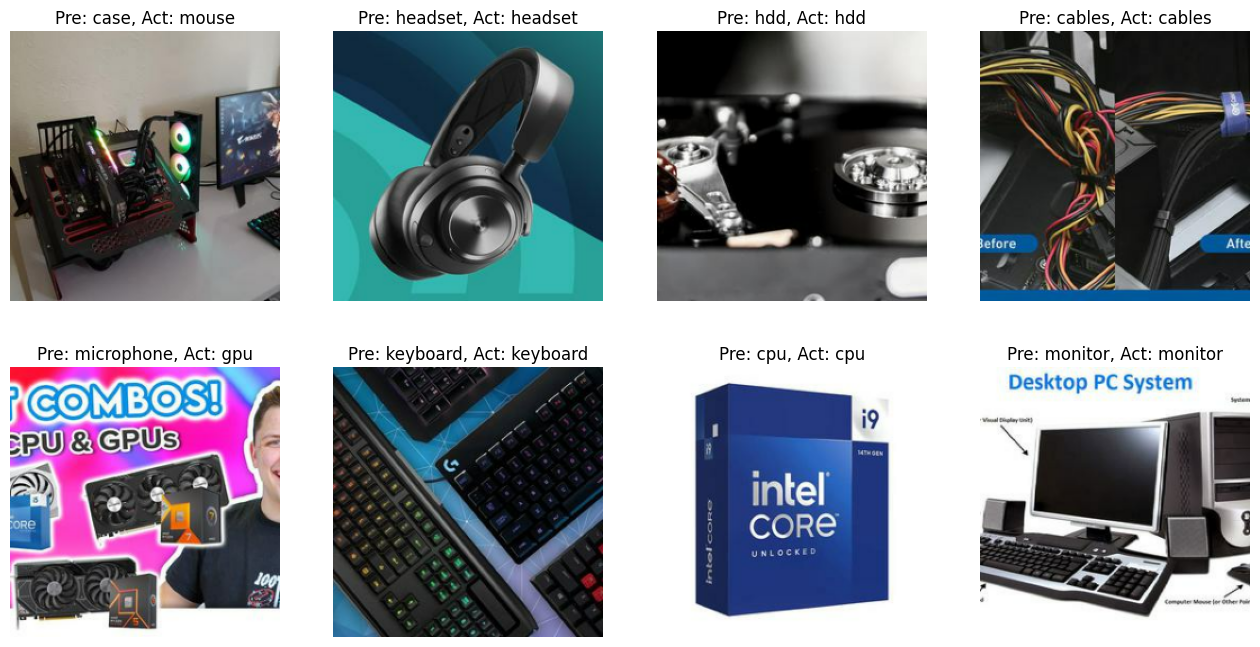

In [15]:
import matplotlib.pyplot as plt

# Displaying the predictions and actual class names
for images, labels in test_data.take(1):  # Take one batch of images from the test data
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    predicted_class_names = [class_names[i] for i in predicted_classes]
    actual_class_names = [class_names[i] for i in labels]

    # Displaying images in a 2x4 grid
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # 2 rows, 4 columns

    for i in range(8):  # Loop through all images in the batch
        row = i // 4
        col = i % 4
        axes[row, col].imshow(images[i].numpy().astype("uint8"))
        axes[row, col].set_title(f'Pre: {predicted_class_names[i]}, Act: {actual_class_names[i]}')
        axes[row, col].axis('off')

    plt.show()